<a href="https://colab.research.google.com/github/AMIN-nsri/fuzzy-logic-system-for-sport-exercise-recommendation/blob/main/sport_exercise_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [45]:
# Input variables
fitness = ctrl.Antecedent(np.arange(0, 11, 1), 'fitness')  # 0: Beginner, 10: Advanced
energy = ctrl.Antecedent(np.arange(0, 11, 1), 'energy')    # 0: Low, 10: High
goal = ctrl.Antecedent(np.arange(0, 3, 1), 'goal')          # 0: Weight Loss, 1: Muscle Gain, 2: General Fitness
age = ctrl.Antecedent(np.arange(10, 81, 1), 'age')          # in years
weight = ctrl.Antecedent(np.arange(40, 121, 1), 'weight')   # in kg
experience = ctrl.Antecedent(np.arange(0, 11, 1), 'experience')
motivation = ctrl.Antecedent(np.arange(0, 11, 1), 'motivation')

# Output variables
intensity = ctrl.Consequent(np.arange(0, 11, 1), 'intensity')  # 0: Low, 10: High
duration = ctrl.Consequent(np.arange(0, 61, 1), 'duration')    # in minutes

# Membership functions for fitness
fitness['beginner'] = fuzz.trimf(fitness.universe, [0, 0, 4])
fitness['intermediate'] = fuzz.trimf(fitness.universe, [2, 5, 8])
fitness['advanced'] = fuzz.trimf(fitness.universe, [6, 10, 10])

# Membership functions for energy
energy['low'] = fuzz.trimf(energy.universe, [0, 0, 4])
energy['medium'] = fuzz.trimf(energy.universe, [3, 5, 7])
energy['high'] = fuzz.trimf(energy.universe, [6, 10, 10])

# Membership functions for goal
goal['weight_loss'] = fuzz.trimf(goal.universe, [0, 0, 0.5])
goal['muscle_gain'] = fuzz.trimf(goal.universe, [0.5, 1, 1.5])
goal['general'] = fuzz.trimf(goal.universe, [1.5, 2, 2])

# Membership functions for age
age['young'] = fuzz.trimf(age.universe, [10, 20, 35])
age['middle'] = fuzz.trimf(age.universe, [30, 45, 60])
age['elder'] = fuzz.trimf(age.universe, [55, 70, 80])

# Membership functions for weight
weight['underweight'] = fuzz.trimf(weight.universe, [40, 45, 55])
weight['normal'] = fuzz.trimf(weight.universe, [50, 65, 80])
weight['overweight'] = fuzz.trimf(weight.universe, [75, 100, 120])

# Membership functions for intensity
intensity['low'] = fuzz.trimf(intensity.universe, [0, 0, 4])
intensity['medium'] = fuzz.trimf(intensity.universe, [3, 5, 7])
intensity['high'] = fuzz.trimf(intensity.universe, [6, 10, 10])

# Membership functions for duration
duration['short'] = fuzz.trimf(duration.universe, [0, 0, 20])
duration['medium'] = fuzz.trimf(duration.universe, [15, 30, 45])
duration['long'] = fuzz.trimf(duration.universe, [40, 60, 60])

experience['low'] = fuzz.trimf(experience.universe, [0, 0, 4])
experience['medium'] = fuzz.trimf(experience.universe, [3, 5, 7])
experience['high'] = fuzz.trimf(experience.universe, [6, 10, 10])

motivation['low'] = fuzz.trimf(motivation.universe, [0, 0, 4])
motivation['medium'] = fuzz.trimf(motivation.universe, [3, 5, 7])
motivation['high'] = fuzz.trimf(motivation.universe, [6, 10, 10])

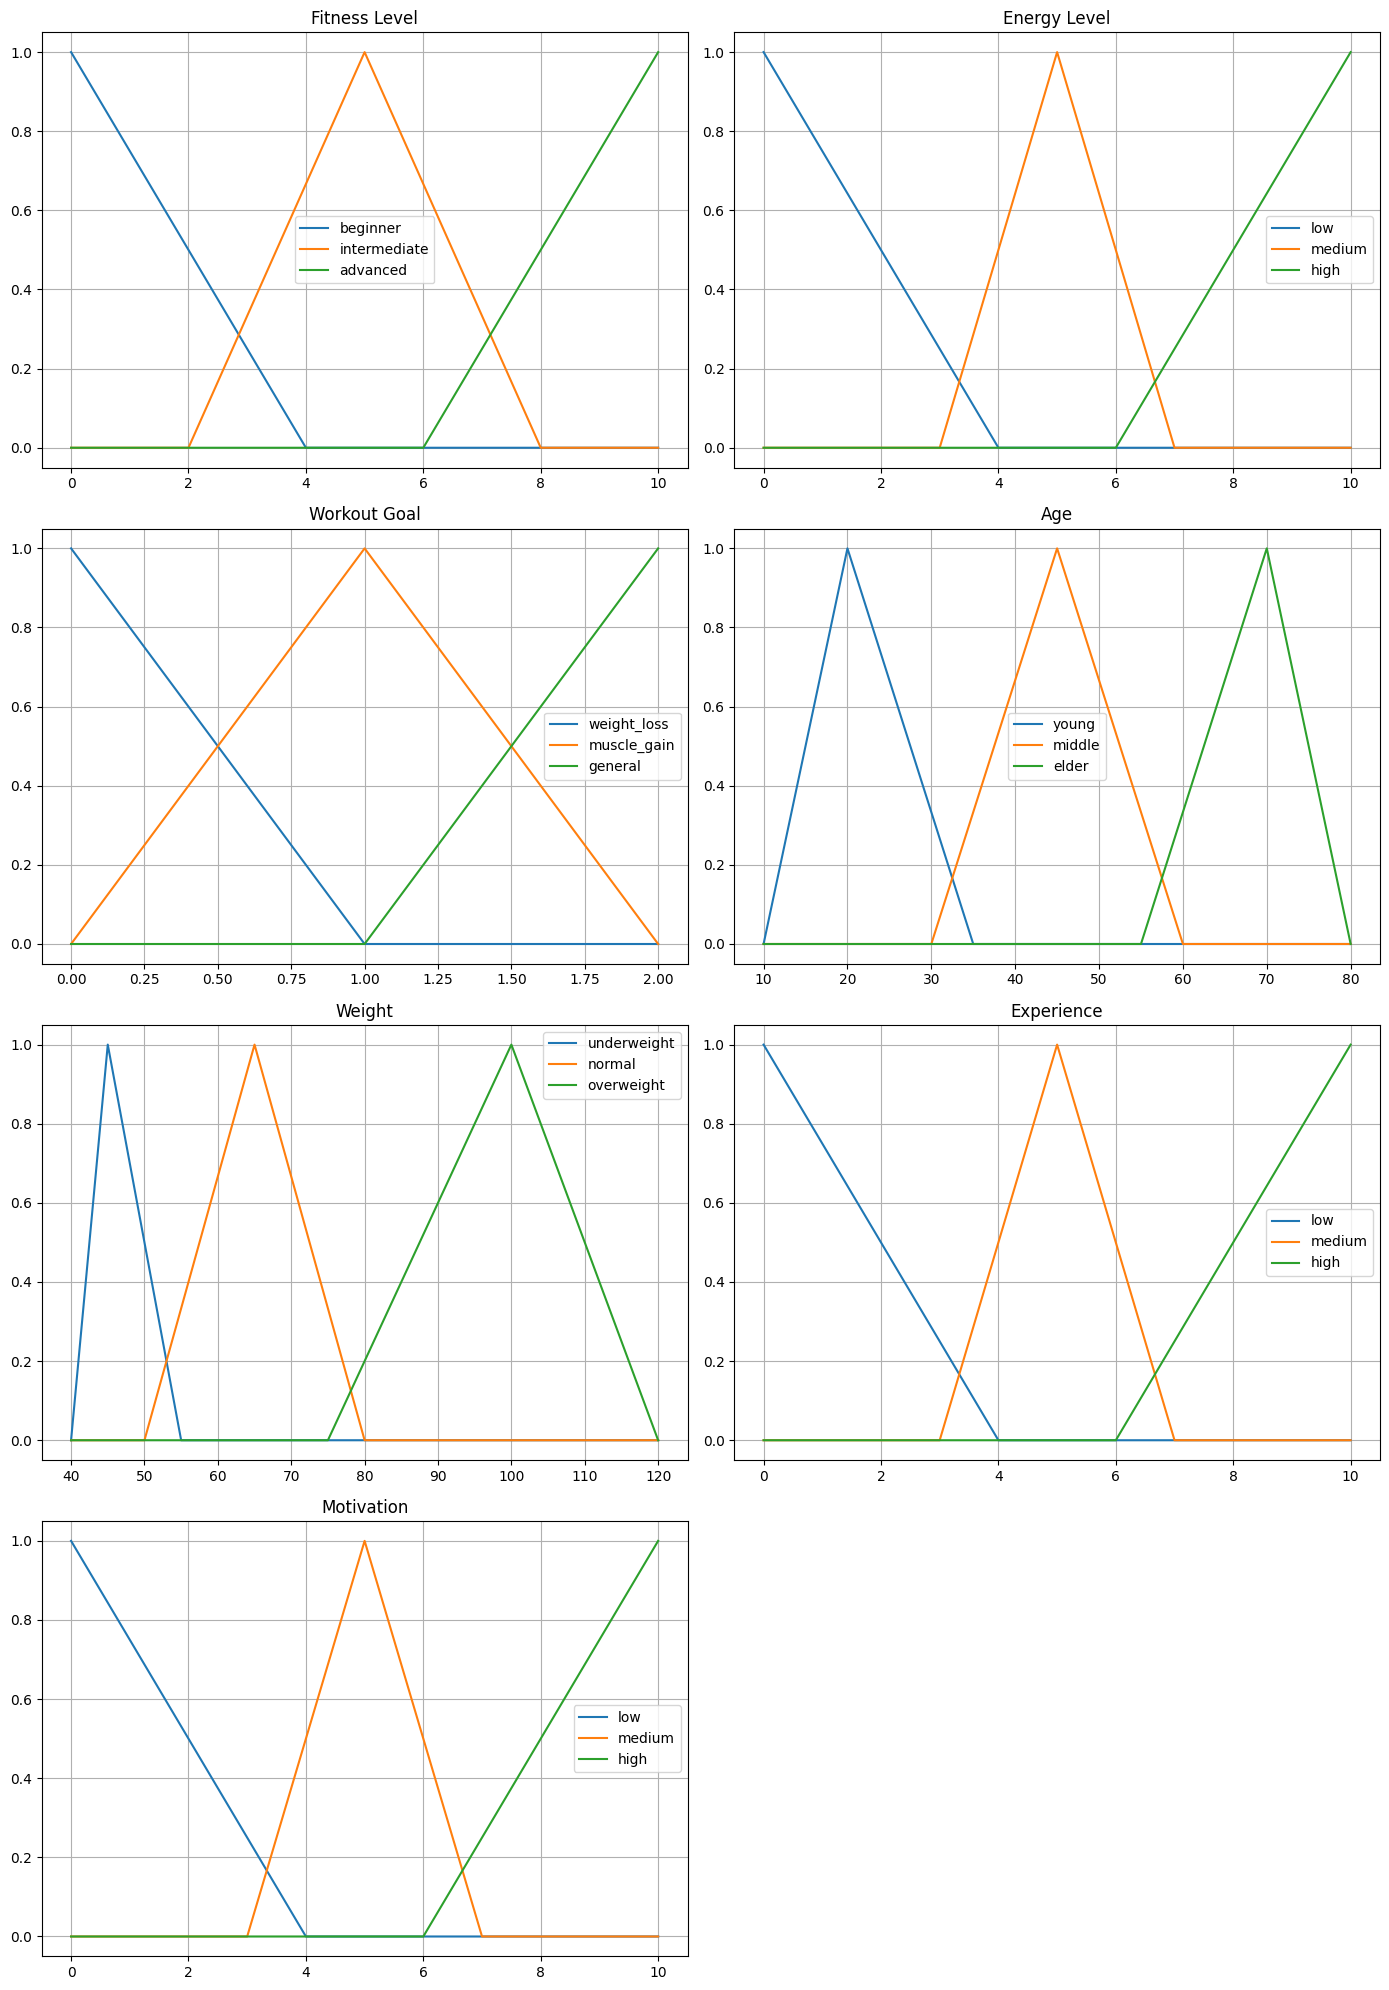

In [46]:
def plot_mf(var, var_name, ax):
    for label in var.terms:
        mf = var.terms[label].mf
        ax.plot(var.universe, mf, label=label)
    ax.set_title(var_name)
    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(4, 2, figsize=(14, 20))
axs = axs.flatten()

plot_mf(fitness, 'Fitness Level', axs[0])
plot_mf(energy, 'Energy Level', axs[1])
plot_mf(goal, 'Workout Goal', axs[2])
plot_mf(age, 'Age', axs[3])
plot_mf(weight, 'Weight', axs[4])
plot_mf(experience, 'Experience', axs[5])
plot_mf(motivation, 'Motivation', axs[6])

fig.delaxes(axs[7])

plt.tight_layout()
plt.show()

In [47]:
# Fuzzy rules
rules = [
    ctrl.Rule(fitness['beginner'] & energy['low'], intensity['low']),
    ctrl.Rule(fitness['advanced'] & energy['high'], intensity['high']),
    ctrl.Rule(goal['weight_loss'] & age['elder'], duration['short']),
    ctrl.Rule(goal['muscle_gain'] & energy['medium'], intensity['medium']),
    ctrl.Rule(age['young'] & fitness['intermediate'], duration['long']),
    ctrl.Rule(weight['overweight'] & goal['weight_loss'], duration['long']),
    ctrl.Rule(fitness['intermediate'] & energy['medium'], intensity['medium']),
    ctrl.Rule(goal['general'] & weight['normal'], duration['medium']),
    ctrl.Rule(experience['low'], intensity['low']),
    ctrl.Rule(motivation['high'], intensity['high']),
]

# Control system
exercise_ctrl = ctrl.ControlSystem(rules)
exercise = ctrl.ControlSystemSimulation(exercise_ctrl)

# Example input
exercise.input['fitness'] = 3
exercise.input['energy'] = 4
exercise.input['goal'] = 0
user_age = 65
exercise.input['age'] = user_age
exercise.input['weight'] = 85
exercise.input['experience'] = 2
exercise.input['motivation'] = 8

# Compute result
exercise.compute()




In [51]:
# Age-based personalization
def age_weight(age_val):
    return 0.85 if age_val > 60 else 1.0

# User preference ('lighter', 'harder', 'default')
user_pref = 'lighter'

base_intensity = exercise.output['intensity']
base_duration = exercise.output['duration']
print("Base Intensity:", round(base_intensity, 2))
print("Base Duration (min):", round(base_duration, 2))

# Apply age and user preferences
scaled_intensity = base_intensity * age_weight(user_age)
scaled_duration = base_duration * age_weight(user_age)

if user_pref == 'lighter':
    scaled_intensity *= 0.9
    scaled_duration *= 1.1
elif user_pref == 'harder':
    scaled_intensity *= 1.1
    scaled_duration *= 0.9



Base Intensity: 5.0
Base Duration (min): 25.9


Adjusted Intensity: 3.82
Adjusted Duration (min): 24.21


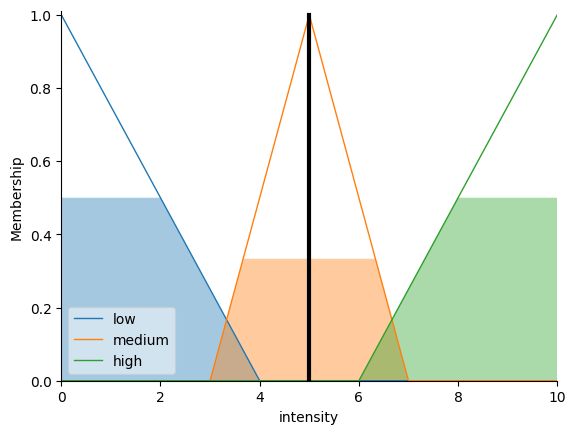

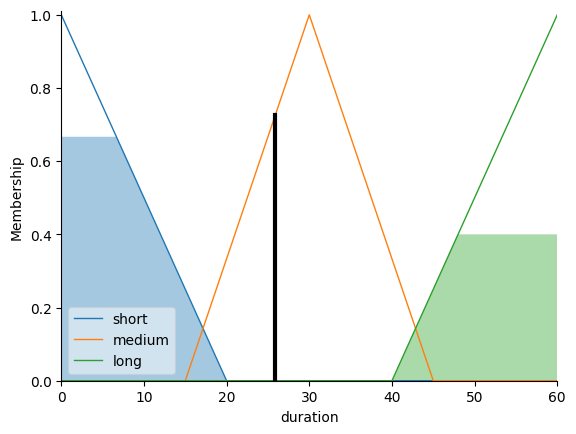

In [49]:
# Final Results
print("Adjusted Intensity:", round(scaled_intensity, 2))
print("Adjusted Duration (min):", round(scaled_duration, 2))

# Output membership plots
intensity.view(sim=exercise)
duration.view(sim=exercise)
plt.show()